C:\Users\flori\AppData\Local\Temp\ipykernel_55320\3055798041.py:24: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir_band - red_band) / (nir_band + red_band)


NDVI calculation complete.


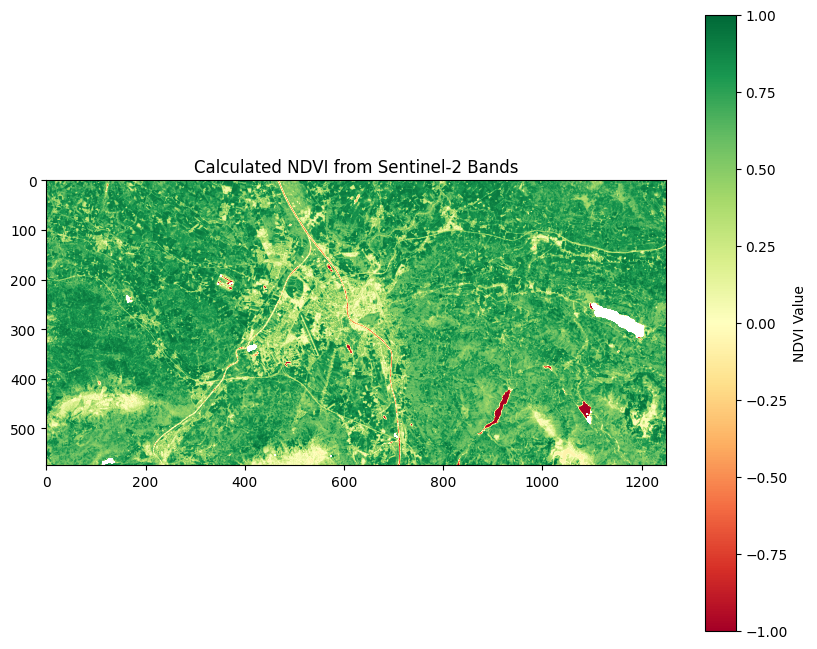

NDVI visualization displayed.


In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt # Import matplotlib for visualization

def calculate_ndvi(red_band, nir_band):
    """
    Calculates the Normalized Difference Vegetation Index (NDVI).

    NDVI = (NIR - Red) / (NIR + Red)

    Args:
        red_band (np.array): A 2D NumPy array representing the Red band of the image.
        nir_band (np.array): A 2D NumPy array representing the Near-Infrared band of the image.

    Returns:
        np.array: A 2D NumPy array representing the calculated NDVI values.
                  Values typically range from -1 to 1.
    """
    # Ensure bands are float type to prevent integer division issues
    red_band = red_band.astype(np.float32)
    nir_band = nir_band.astype(np.float32)


    ndvi = (nir_band - red_band) / (nir_band + red_band)

    return ndvi

def visualize_ndvi(ndvi_array, title="NDVI Visualization"):
    """
    Visualizes the NDVI array using a colormap.

    Args:
        ndvi_array (np.array): A 2D NumPy array representing the calculated NDVI values.
        title (str): The title for the plot.
    """
    plt.figure(figsize=(10, 8))
    # Using 'RdYlGn' colormap: Red for low NDVI (e.g., bare soil, water),
    # Yellow for moderate, Green for high NDVI (dense vegetation)
    plt.imshow(ndvi_array, cmap='RdYlGn', vmin=-1, vmax=1)
    plt.colorbar(label="NDVI Value")
    plt.title(title)
    plt.show()


# Load the Red and NIR bands using rasterio
with rasterio.open('B4.tiff') as red_src:
    red_band = red_src.read(1) # Read the first (and only) band

with rasterio.open('B8.tiff') as nir_src:
    nir_band = nir_src.read(1) # Read the first (and only) band

# Calculate NDVI
ndvi_result = calculate_ndvi(red_band, nir_band)
print("NDVI calculation complete.")

# Visualize the NDVI result
visualize_ndvi(ndvi_result, title="Calculated NDVI from Sentinel-2 Bands")
print("NDVI visualization displayed.")